## Søk og konkordanser, korpus

In [3]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.css()

In [5]:
from dhlab.nbtext import unigram, dewey
import pandas as pd

def join_dewey(ddk):
    res = str(ddk)
    desc = dewey(ddk)
    res += " " + ' - '.join([desc[i][1] for i in desc])
    return res

def dewey_dist(word, base = None, relative=True):
    res = dict()
    if base != None:
        base_ddk = str(base)
    else:
        base_ddk = ''
    for i in range(0,10,1):
        #dewey = "{0:0>3}".format(i)
        deweycode = base_ddk + str(i)
        #print(deweycode)
        dewey_search = deweycode + "%"
        dta = unigram(word, media='bok',ddk=dewey_search).sum()
        try:
            res[join_dewey(deweycode)] = int(dta)
        except:
            res[join_dewey(deweycode)] = 0
    return res

In [11]:
d = nb.frame(dewey_dist('morfologi', base=4))

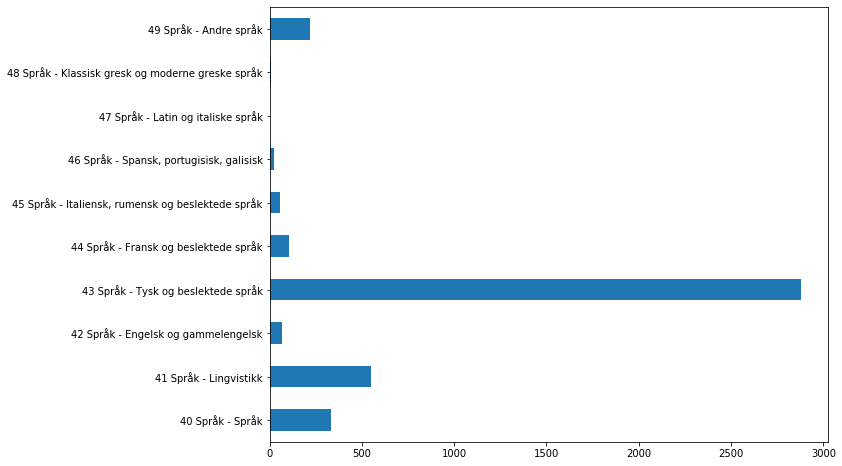

In [12]:
d.plot(kind='barh', figsize=(10,8), legend=False)

Søk i hele samlingen, begrens i hvilke typer bøker med emneord eller  [webdewey](https://deweysearchno.pansoft.de/webdeweysearch/mainClasses.html?reset=schedules)

In [12]:
nb.concordance(word= 'sjark', subject='fangst', corpus='bok', after=10, before=10, kind='html', size=5)

"Fygle, Svein,Fiske og fangst i Steigen,1977","bygd en motorbåt i Salten , en 28 fots klavertbygd",sjark,med en 7 HK « Trygg » - motor .
"Farstad, Arnold,norske fiskaren,2003",med han Edevard Esbensen . Han hadde ein 30 fots,sjark,"som fridag heile året heitte « Bølgen » , og"
"Tangen, Magnus,Størjefisket på Vestlandet,1999",fylt opp . I tillegg ble det lastet i en,sjark,. Kastet gav nærmere 80 tonn og er
"Ørebech, Peter,""Tvers igjennom lov til seier"",2003","på ringnotsnurpere , trålere , snurrevadbåter etc. har en mindre",sjark,None
"Hay, Arnfinn,Fiske og fangst,1996","av størrelse , skrogform og redskapstyper , fra den minste",sjark,"til det havgående fabrikkskip , har fartøy mange fellestrekk som"


Samme ord, for eksempel *crepe*, i to omganger.

In [29]:
nb.concordance(word= 'crepe', ddk='641%', corpus='bok', after=10, before=10, kind='html', size=5)

",Store fingermat kokeboken,2004","... „ A „ , i , r , bladpersille",crepe,". Rull den rast sammen , som en kornett ("
"Lone, Steinar,Bon appétit!,2002",flcelle,crepe,"with ham , white sauce and mushrooms pannekake med skinke"
",Cappelens nye kokebok,2006",omgang . Beregn ca. 1 / 2 dl røre pr.,crepe,.
",Cappelens nye kokebok,2006",Legg 1 ss rømme eller créme fraiche på hver,crepe,. Topp med rogn
",Cappelens nye kokebok,2003",None,crepe,.
"France, Christine,1 røre, 100 vafler og pannekaker,2012",Legg en passelig mengde fyll midt på hver,crepe,", brett de motsatte sidene inn mot midten , pynt"
"France, Christine,1 røre, 100 vafler og pannekaker,2012",med salt og pepper . Legg en skinkeskive på hver,crepe,", og fordel oste- og spinatblandingen på crepene . Rull"
"France, Christine,1 røre, 100 vafler og pannekaker,2012",Legg fyllet med skje på den ene siden av hver,crepe,", og brett den andre siden over . Anrett dem"
"France, Christine,1 røre, 100 vafler og pannekaker,2012",en skje rømme og en skje revet ost på hver,crepe,". Brett sammen , og server med en gang ."
"France, Christine,1 røre, 100 vafler og pannekaker,2012",". Brett inn 2,5 cm på motsatte sider av hver",crepe,". Fordel fyllet på crepene , og rull dem ganske"


In [30]:
nb.concordance(word= 'crepe', ddk='646%', corpus='bok', after=10, before=10, kind='html', size=5)

"Spillane, Mary,Kle deg vakker,1992","for strengt . Hvorfor ikke velge kongeblått, i silkechiffon ,",crepe,"jersey eller taft ? Når du skal slappe av ,"
",Gyldendals store sy- & håndarbeidsbok,1963","lett lurvete , derfor M2 f . eks. ullgeorgette og",crepe,dampes meget forsiktig . Legg et tørt ullklede mellom stoffet
",Gyldendals store sy- & håndarbeidsbok,1963","er alminnelig a lore trange , rette slcjort med Icunst",crepe,"de cnine , Icunsttalt eller nelsill ^ e iapon ."
"Knight, Lorna,Søm,2008",cordonnetsting 111,crepe,de chine 212
"Lund, Ella,Sy selv,1958","brukes i kanten av en kappe , f.eks. georgette eller",crepe,de chine . Stingene virker alltid større i et tynt
"Pooser, Doris,Lekker og velkledd,1986",None,crepe,None


In [19]:
nb.concordance(word= 'crêpe', corpus='bok', after=10, before=10, kind='html', size=5)

"Hansteen, Christopher,Souvenirs d'un voyage en Siberie,1857",et rondes ; des gants blancs et une coiffure de,crêpe,avec des plumes ondoyantes complétaient sa toilette . Près de
"Bødtker, A. Trampe,Franske lesestykker for gymnasiet,1932","six semaines . Yous voyez , j ’ ai un",crêpe,"à mon chapeau . , . Mais je vous conterai"


Bygg et stort nynorsk-korpus

In [22]:
nno = nb.book_corpus(lang = 'nno', limit = 50000)
len(nno)

32291

In [31]:
nno.head()

,urn,author,title,year
0,2013080808079,,Evangeliet etter Lukas,1884
1,2011062706109,"Skorstad, Berit",Sosialkunnskap,2003
2,2009052900058,"Haraldsen, Mette",Arbeidsbok til Norsk for yrkesfaga 1,1992
3,2008020604038,"Aadland, Einar","Kultur i helse-, sosial- og utdanningsorganisa...",1994
4,2012050308092,"Hellesnes, Jon",Etikk-satsing?,1993


In [23]:
nb.word_paradigm('sjark')

[['subs', ['sjark', 'sjarken', 'sjarkene', 'sjarker']]]

In [24]:
nb.urn_concordance(word=['sjark', 'sjarken', 'sjarkene', 'sjarker'], urns=nb.refine_book_urn(urns=nb.pure_urn(nno), words=['sjark', "sjarken"], limit=50))

"Lingua, , 2001",None,sjark,"- en , - ar"
"Kron og mynt, Fløgstad, Kjartan, 2002",enkle livet som kystfiskar med,sjark,på havet og frysebil på
"Musikkisum, Bøe, Odd-Magne, 1999",Og,sjarken,"din Edvard , ka gjer"
"Musikkisum, Bøe, Odd-Magne, 1999","mesanen under armen , sett",sjarken,på land . For kvar
"Musikkisum, Bøe, Odd-Magne, 1999","hammaren godt , og få",sjarken,i støa fortøyd .
"Portrett av ein varulv, Tiller, Carl Frode, 2011","hai , du tenker på",sjark,", du . JANNIKE :"
"Portrett av ein varulv, Tiller, Carl Frode, 2011",( ler ) Eg er,sjarken,på vatnet .
"Stjernefiske, Tolaas, Jon, 1985","land , kjøpte seg ein",sjark,og dreiv havet etter gehør
"Stjernefiske, Tolaas, Jon, 1985","på kaia , såg eg",sjarken,til Basen . Det var
"Stjernefiske, Tolaas, Jon, 1985",står og oljar dekket på,sjarken,. Eldre er han blitt
"Stjernefiske, Tolaas, Jon, 1985",han kom i,sjarken,sin og la til framfor


Lager en hjelpekommando for å søke i store korpus (over noen hundre bøker)

In [45]:
speedkonk = lambda søkeord, input_korpus: nb.urn_concordance(word=søkeord, urns=nb.refine_book_urn(urns=nb.pure_urn(input_korpus), words=søkeord, limit=10))

In [46]:
speedkonk('gjev', nno)

"Liabygda, Søvik, Helge, 2011",direkte frå eit forlag som,gjev,dei ut for fullt orkester
"Edda-kvæde, , 1944",45 Brødrar kvarandre banesår,gjev,","
"Edda-kvæde, , 1944",2 Sæl den som,gjev,! Gjest er inn komen
"Edda-kvæde, , 1944",None,gjev,"ingen mann fred , run"
"Edda-kvæde, , 1944",None,gjev,han heile din hug og
"Edda-kvæde, , 1944",sverd,gjev,"kvasse hogg , kyssar gjev"
"Exodus, Norstog, Jon, 1928",eg stig yver muren og,gjev,landet all den rikdom eg
"Exodus, Norstog, Jon, 1928",~ Dei,gjev,"sitt metal som dei hine,"
"Exodus, Norstog, Jon, 1928",som han ikkje vil og,gjev,baade han og oss sjølve
"Ut fjorden, , 1986","gjennom årane utan avbrot ,",gjev,"frå seg næring , tek"
"Ut fjorden, , 1986",Skaparen sjølv,gjev,deg dåpen og kviskrar ditt


## Korpuslogikk - snitt, union differanse

Definer et utgangspunkt 

In [52]:
sært_korpus = nb.book_corpus(words=['morfologi'], period=(1990, 2000), limit=3000)
len(sært_korpus)

1607

En konkordans gir resultater på tvers av domener

In [54]:
speedkonk('morfologi', sært_korpus)

"Fortellinger fra stellerommet, Aukrust, Vibeke Grøver, 1995","en mer korrekt syntaks ,",morfologi,eller fonologi . Utvidelsen kan
"Fortellinger fra stellerommet, Aukrust, Vibeke Grøver, 1995","repetisjoner er barneytringens syntaks ,",morfologi,og fonologi identisk med modellytringen
"Konservering av rånesæd, Paulenz, Heiko, 1994","av volum , motilitet og",morfologi,et viktig kriterium ved sædbedømmelse
"Humanistisk informasjonsteknologi, , 1991",None,morfologi,", nederlandsk språk 1 1"
"Humanistisk informasjonsteknologi, , 1991",None,morfologi,", tonivå 18"
"Humanistisk informasjonsteknologi, , 1991","nederlandsk språk ,",morfologi,"1 1 Nord-Norge , fortidsminner"
"Vegetation-environment relationships of boreal coniferous forests in the Solhomfjell area, Gjerstad, S Norway, Økland, Rune Halvorsen, 1993",Østlandets myrområder - utbredelse og,morfologi,. - Norske Kom .
"""Alle ville trøste"" -, Flaa, Venke Urdahl, 1998","ansiktsspalters etiologi , patogonese og",morfologi,. I :
"Lingvistisk analyse av avvikende språk, , 1992","språklige nivåene , fonologi ,",morfologi,", syntaks og semantikk ,"
"Lingvistisk analyse av avvikende språk, , 1992",opplevelser med riktig syntaks og,morfologi,og med få semantiske avvik
"Lingvistisk analyse av avvikende språk, , 1992","de språklige komponentene fonologi ,",morfologi,", semantikk og syntaks ."


Ta bort domenene som ikke skal være med, biologi og medisin, for eksempel. Benytt `refine_book_urn`

In [53]:
fratrekk = nb.frame(nb.refine_book_urn(words=['planter', 'anatomi'], urns=nb.pure_urn(sært_korpus)), 'urn')
len(fratrekk)

20

Kombiner korpusene, trekk det ene fra det andre.

In [49]:
særere_korpus = list(set(sært_korpus.urn) - set(fratrekk.urn))

Kjør *speedkonk* på resultatet

In [50]:
speedkonk('morfologi', særere_korpus)

"Verneplan for vassdrag IV, , 1991",utvalg av sjøer med forskjellig,morfologi,og i forskjellig høyde over
"Det slaviske og det norske språk og kultur i kontakt, Lie, Branka M., 1996","for ortografi , fonologi ,",morfologi,"og syntaks , men var"
"Det slaviske og det norske språk og kultur i kontakt, Lie, Branka M., 1996",nok kunnskaper om syntaks og,morfologi,for å bygge ut litt
"Det slaviske og det norske språk og kultur i kontakt, Lie, Branka M., 1996",", som f . eks.",morfologi,og syntaks . Visse parameterverdier
"Norsk referansegrammatikk, , 1999","når det gjelder syntaks ,",morfologi,og semantikk . Den viktigste
"Undersøkelser i forbindelse med kraftutbygging i Meråker, Nord Trøndelag, , 1996","få beskrevet funnmaterialet , dets",morfologi,om man vil . Om
"Kompetansekatalog for naturhistoriske museer 1995, , 1995",monterkonstruksjon biologi,morfologi,parasitt
"Kompetansekatalog for naturhistoriske museer 1995, , 1995",None,morfologi,zoologi
"Kompetansekatalog for naturhistoriske museer 1995, , 1995",None,morfologi,zoologi
"Munnharpas tidlige historie i Skandinavia, Kolltveit, Gjermund, 1996",blant annet for seg munnharpenes,morfologi,med vekt på størrelse og
"Språk i Norden 1994, , 1994","dansk riksmål , fonologi ,",morfologi,og syntaks - og alt
